In [171]:
# writing a cfg
terminals = list(map(lambda x: str(x), range(2)))
terminals = ['(', ')']
nonterminals = ['A', 'B', 'C', 'D']

In [172]:
terminals, nonterminals

(['(', ')'], ['A', 'B', 'C', 'D'])

In [173]:
productions = {}
productions['A'] = set(['AA', 'BD', 'BC'])
productions['B'] = set(['('])
productions['C'] = set([')'])
productions['D'] = set(['AC'])
print('\n'.join(f'{k}: {v}' for k,v in productions.items()))

A: {'BD', 'AA', 'BC'}
B: {'('}
C: {')'}
D: {'AC'}


In [174]:
terminals = ['a', 'b']
nonterminals = ['S', 'A', 'B', 'C', 'D']
productions = {}
productions['S'] = set(['AB', 'BA', 'SS', 'AC', 'BD'])
productions['A'] = set(['a'])
productions['B'] = set(['b'])
productions['C'] = set(['SB'])
productions['D'] = set(['SA'])
print('\n'.join(f'{k}: {v}' for k,v in productions.items()))

S: {'BD', 'BA', 'AC', 'AB', 'SS'}
A: {'a'}
B: {'b'}
C: {'SB'}
D: {'SA'}


In [175]:
s = 'aabbab'
n = len(s)+1

In [176]:
dp = {(j,i):set() for i in range(n) for j in range(i)}
def pretty_print(dp):
    print('\n'.join(f'({i}, {i+j}): {dp[i,i+j]}' for j in range(1,n) for i in range(n-j)))
pretty_print(dp)

(0, 1): set()
(1, 2): set()
(2, 3): set()
(3, 4): set()
(4, 5): set()
(5, 6): set()
(0, 2): set()
(1, 3): set()
(2, 4): set()
(3, 5): set()
(4, 6): set()
(0, 3): set()
(1, 4): set()
(2, 5): set()
(3, 6): set()
(0, 4): set()
(1, 5): set()
(2, 6): set()
(0, 5): set()
(1, 6): set()
(0, 6): set()


In [177]:
for N in nonterminals:
    for prod in productions[N]:
        if len(prod) > 1: continue
        for i in range(n-1):
            if prod == s[i:i+1]:
                dp[i,i+1].add(N)
pretty_print(dp)

(0, 1): {'A'}
(1, 2): {'A'}
(2, 3): {'B'}
(3, 4): {'B'}
(4, 5): {'A'}
(5, 6): {'B'}
(0, 2): set()
(1, 3): set()
(2, 4): set()
(3, 5): set()
(4, 6): set()
(0, 3): set()
(1, 4): set()
(2, 5): set()
(3, 6): set()
(0, 4): set()
(1, 5): set()
(2, 6): set()
(0, 5): set()
(1, 6): set()
(0, 6): set()


In [178]:
for N in nonterminals:
    for prod in productions[N]:
        if len(prod) == 1: continue
        for i in range(n-2):
            A, B = prod[0], prod[1]
            ok = False
            for k in range(i+1, i+2):
                if A in dp[i,k] and B in dp[k,i+2]:
                    ok = True
                    break
            if ok: dp[i,i+2].add(N)
pretty_print(dp)

(0, 1): {'A'}
(1, 2): {'A'}
(2, 3): {'B'}
(3, 4): {'B'}
(4, 5): {'A'}
(5, 6): {'B'}
(0, 2): set()
(1, 3): {'S'}
(2, 4): set()
(3, 5): {'S'}
(4, 6): {'S'}
(0, 3): set()
(1, 4): set()
(2, 5): set()
(3, 6): set()
(0, 4): set()
(1, 5): set()
(2, 6): set()
(0, 5): set()
(1, 6): set()
(0, 6): set()


In [179]:
for j in range(3,n):
    for N in nonterminals:
        for prod in productions[N]:
            if len(prod) == 1: continue
            for i in range(n-j):
                A, B = prod[0], prod[1]
                ok = False
                for k in range(i+1, i+j):
                    if A in dp[i,k] and B in dp[k,i+j]:
                        ok = True
                        break
                if ok: dp[i,i+j].add(N)
    pretty_print(dp)
    print()

(0, 1): {'A'}
(1, 2): {'A'}
(2, 3): {'B'}
(3, 4): {'B'}
(4, 5): {'A'}
(5, 6): {'B'}
(0, 2): set()
(1, 3): {'S'}
(2, 4): set()
(3, 5): {'S'}
(4, 6): {'S'}
(0, 3): set()
(1, 4): {'C'}
(2, 5): set()
(3, 6): {'C'}
(0, 4): set()
(1, 5): set()
(2, 6): set()
(0, 5): set()
(1, 6): set()
(0, 6): set()

(0, 1): {'A'}
(1, 2): {'A'}
(2, 3): {'B'}
(3, 4): {'B'}
(4, 5): {'A'}
(5, 6): {'B'}
(0, 2): set()
(1, 3): {'S'}
(2, 4): set()
(3, 5): {'S'}
(4, 6): {'S'}
(0, 3): set()
(1, 4): {'C'}
(2, 5): set()
(3, 6): {'C'}
(0, 4): {'S'}
(1, 5): {'S'}
(2, 6): set()
(0, 5): set()
(1, 6): set()
(0, 6): set()

(0, 1): {'A'}
(1, 2): {'A'}
(2, 3): {'B'}
(3, 4): {'B'}
(4, 5): {'A'}
(5, 6): {'B'}
(0, 2): set()
(1, 3): {'S'}
(2, 4): set()
(3, 5): {'S'}
(4, 6): {'S'}
(0, 3): set()
(1, 4): {'C'}
(2, 5): set()
(3, 6): {'C'}
(0, 4): {'S'}
(1, 5): {'S'}
(2, 6): set()
(0, 5): {'D'}
(1, 6): {'C'}
(0, 6): set()

(0, 1): {'A'}
(1, 2): {'A'}
(2, 3): {'B'}
(3, 4): {'B'}
(4, 5): {'A'}
(5, 6): {'B'}
(0, 2): set()
(1, 3): {'S'}
(2,

In [180]:
print('S' in dp[0,n-1])

True


In [181]:
def cyk(NT, T, P, S, x):
    n = len(x) + 1
    dp = {(j,i):set() for i in range(n) for j in range(i)}
    # basecase
    for N in nonterminals:
        for prod in productions[N]:
            if len(prod) > 1: continue
            for i in range(n-1):
                if prod == x[i:i+1]:
                    dp[i,i+1].add(N)
    # recursion
    for j in range(2,n):
        for N in nonterminals:
            for prod in productions[N]:
                if len(prod) == 1: continue
                for i in range(n-j):
                    A, B = prod[0], prod[1]
                    ok = False
                    for k in range(i+1, i+j):
                        if A in dp[i,k] and B in dp[k,i+j]:
                            ok = True
                            break
                    if ok: dp[i,i+j].add(N)
    return S in dp[0,n-1], dp

In [182]:
ans, dp = cyk(nonterminals, terminals, productions, 'S', s)

In [183]:
ans

True

In [184]:
pretty_print(dp)

(0, 1): {'A'}
(1, 2): {'A'}
(2, 3): {'B'}
(3, 4): {'B'}
(4, 5): {'A'}
(5, 6): {'B'}
(0, 2): set()
(1, 3): {'S'}
(2, 4): set()
(3, 5): {'S'}
(4, 6): {'S'}
(0, 3): set()
(1, 4): {'C'}
(2, 5): set()
(3, 6): {'C'}
(0, 4): {'S'}
(1, 5): {'S'}
(2, 6): set()
(0, 5): {'D'}
(1, 6): {'C'}
(0, 6): {'S'}


In [185]:
def cyk2(NT, T, P, S, x):
    n = len(x) + 1
    dp = {(j,i,N):None for i in range(n) for j in range(i) for N in NT}
    # basecase
    for N in nonterminals:
        for prod in productions[N]:
            if len(prod) > 1: continue
            for i in range(n-1):
                if prod == x[i:i+1]:
                    dp[i,i+1,N] = (i+1, x[i])
    # recursion
    for j in range(2,n):
        for N in nonterminals:
            for prod in productions[N]:
                if len(prod) == 1: continue
                for i in range(n-j):
                    A, B = prod[0], prod[1]
                    ok = None
                    for k in range(i+1, i+j):
                        if dp[i,k,A] and dp[k,i+j,B]:
                            ok = (k,A,B)
                            break
                    if ok: dp[i,i+j,N] = ok
    return bool(dp[0,n-1,S]), dp

In [186]:
ans, dp = cyk2(nonterminals, terminals, productions, 'S', s)
print(ans)
# pretty_print(dp)
# dp

True


In [187]:
class tree:
    def __init__(self, data, l, r) -> None:
        self.data = data
        self.l = l
        self.r = r
    def pretty_print(self):
        import networkx as nx
        g = nx.DiGraph()
        if self.l: 
            gl = self.l.pretty_print()
            g.add_nodes_from(gl.nodes)
            g.add_edges_from(gl.edges)
        if self.r: 
            gr = self.r.pretty_print()
            g.add_nodes_from(gr.nodes)
            g.add_edges_from(gr.edges)
        g.add_node(self.data)
        if self.l: g.add_edge(self, self.l)
        if self.r: g.add_edge(self, self.r)
        return g    

In [188]:
def compute_derivation(N, dp, i, j):
    if j-i <= 1:
        assert j-i == 1
        k = dp[i,j,N]
        assert k, len(k) == 2
        k, t = k
        return tree(N, tree(t, None, None), None)
    
    k = dp[i,j,N]; assert k, len(k) == 3
    k, A, B = k
    return tree(N, compute_derivation(A, dp, i, k), compute_derivation(B, dp, k, j))

In [189]:
t = compute_derivation('S', dp, 0, len(s))

In [190]:
t.data, t.l.data, t.r.data

('S', 'S', 'S')

In [191]:
rt = t.l
rt.data, rt.l.data, rt.r.data

('S', 'A', 'C')

In [192]:
rt = t.l.r
rt.l.r

In [193]:
rt = t.l.l
rt.data, rt.l, rt.r
# rt.data, rt.l.data

('A', <__main__.tree at 0x111b25270>, None)

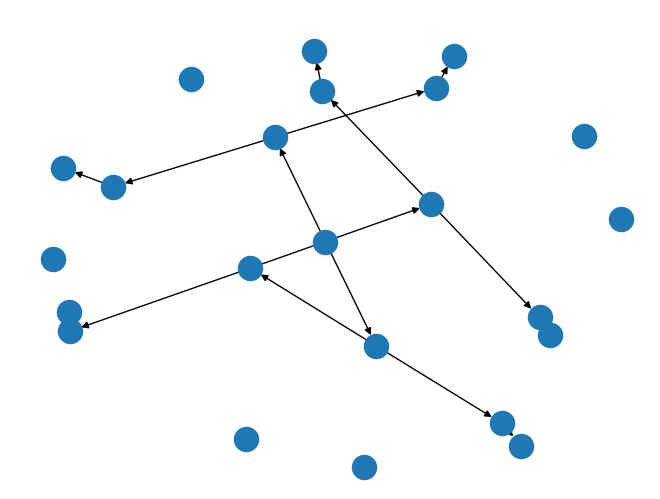

In [195]:
g = t.pretty_print()
import networkx as nx
nx.draw(g)